In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Data Ingestion step
df = pd.read_csv('data/gemstone.csv')

In [12]:
df.shape

(193573, 10)

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing values present in the data

In [8]:
## drop the id column
df = df.drop('id', axis=1)

In [11]:
## check for duplicate records
df.duplicated().value_counts()
df.drop_duplicates()

False    193573
dtype: int64

In [25]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

In [30]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [31]:
df[cat_cols].describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [35]:
df['cut'].nunique()

5

In [36]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [37]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [38]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

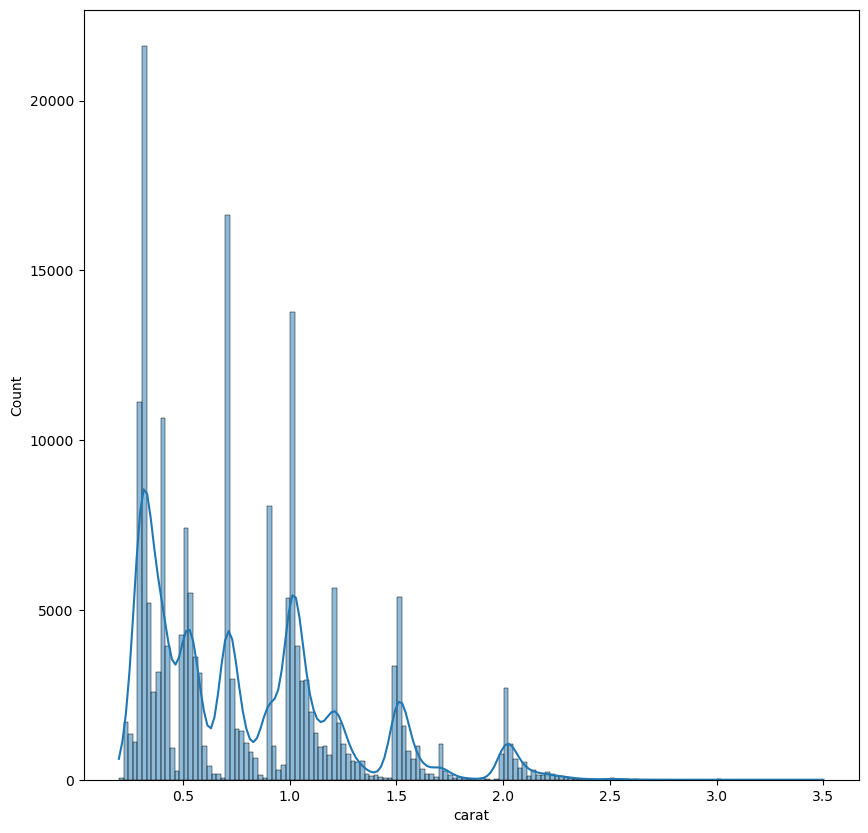

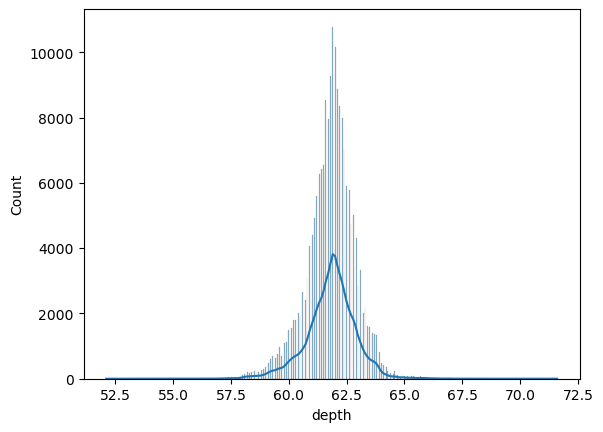

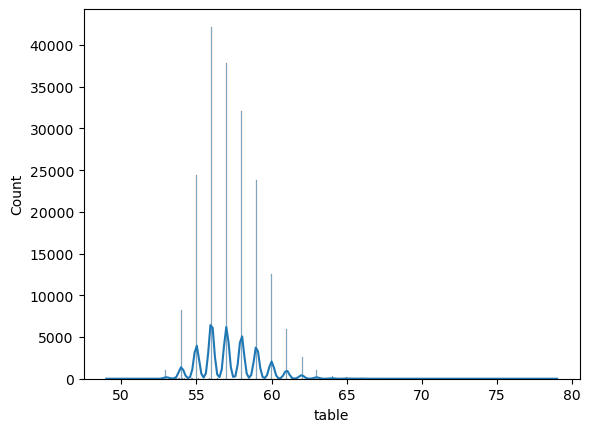

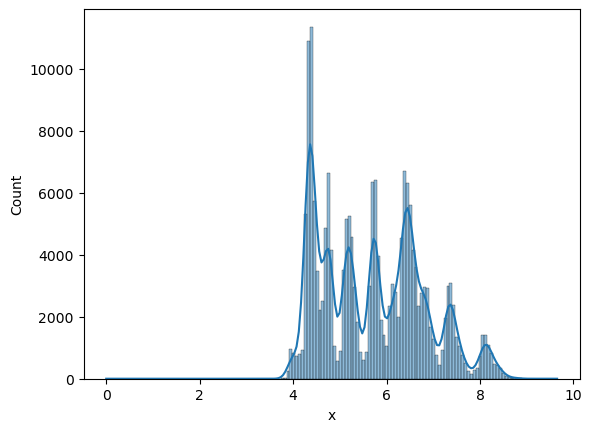

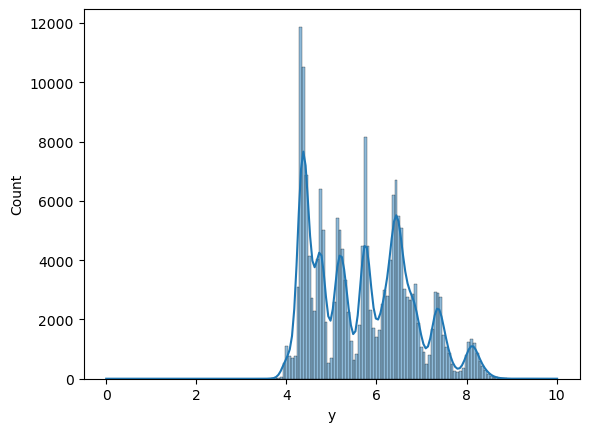

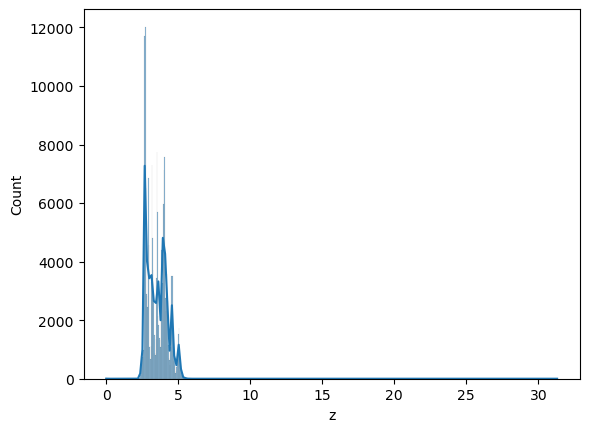

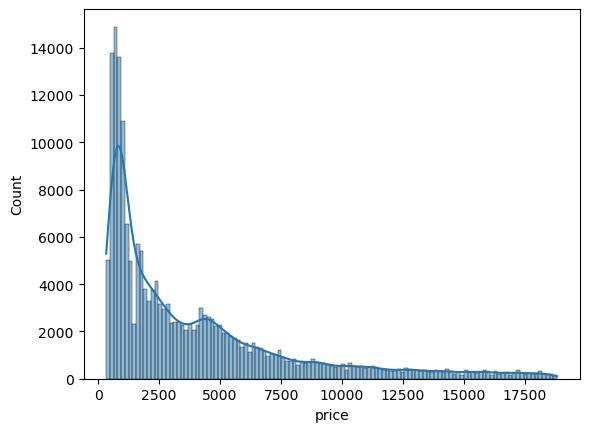

In [49]:
plt.figure(figsize=(10, 10))
for i in num_cols:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

<Axes: >

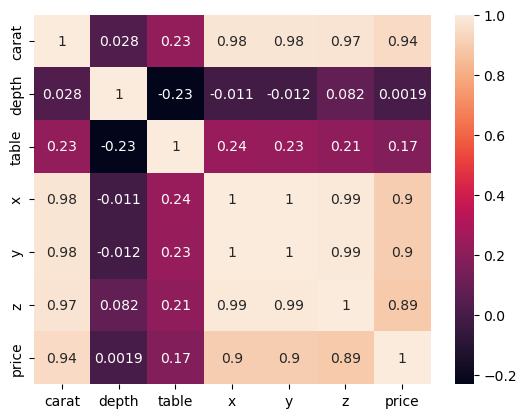

In [51]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

- Drop the column x, y, z --> Highly correlated 
- df.drop(['x', 'y', 'z'], axis=1)

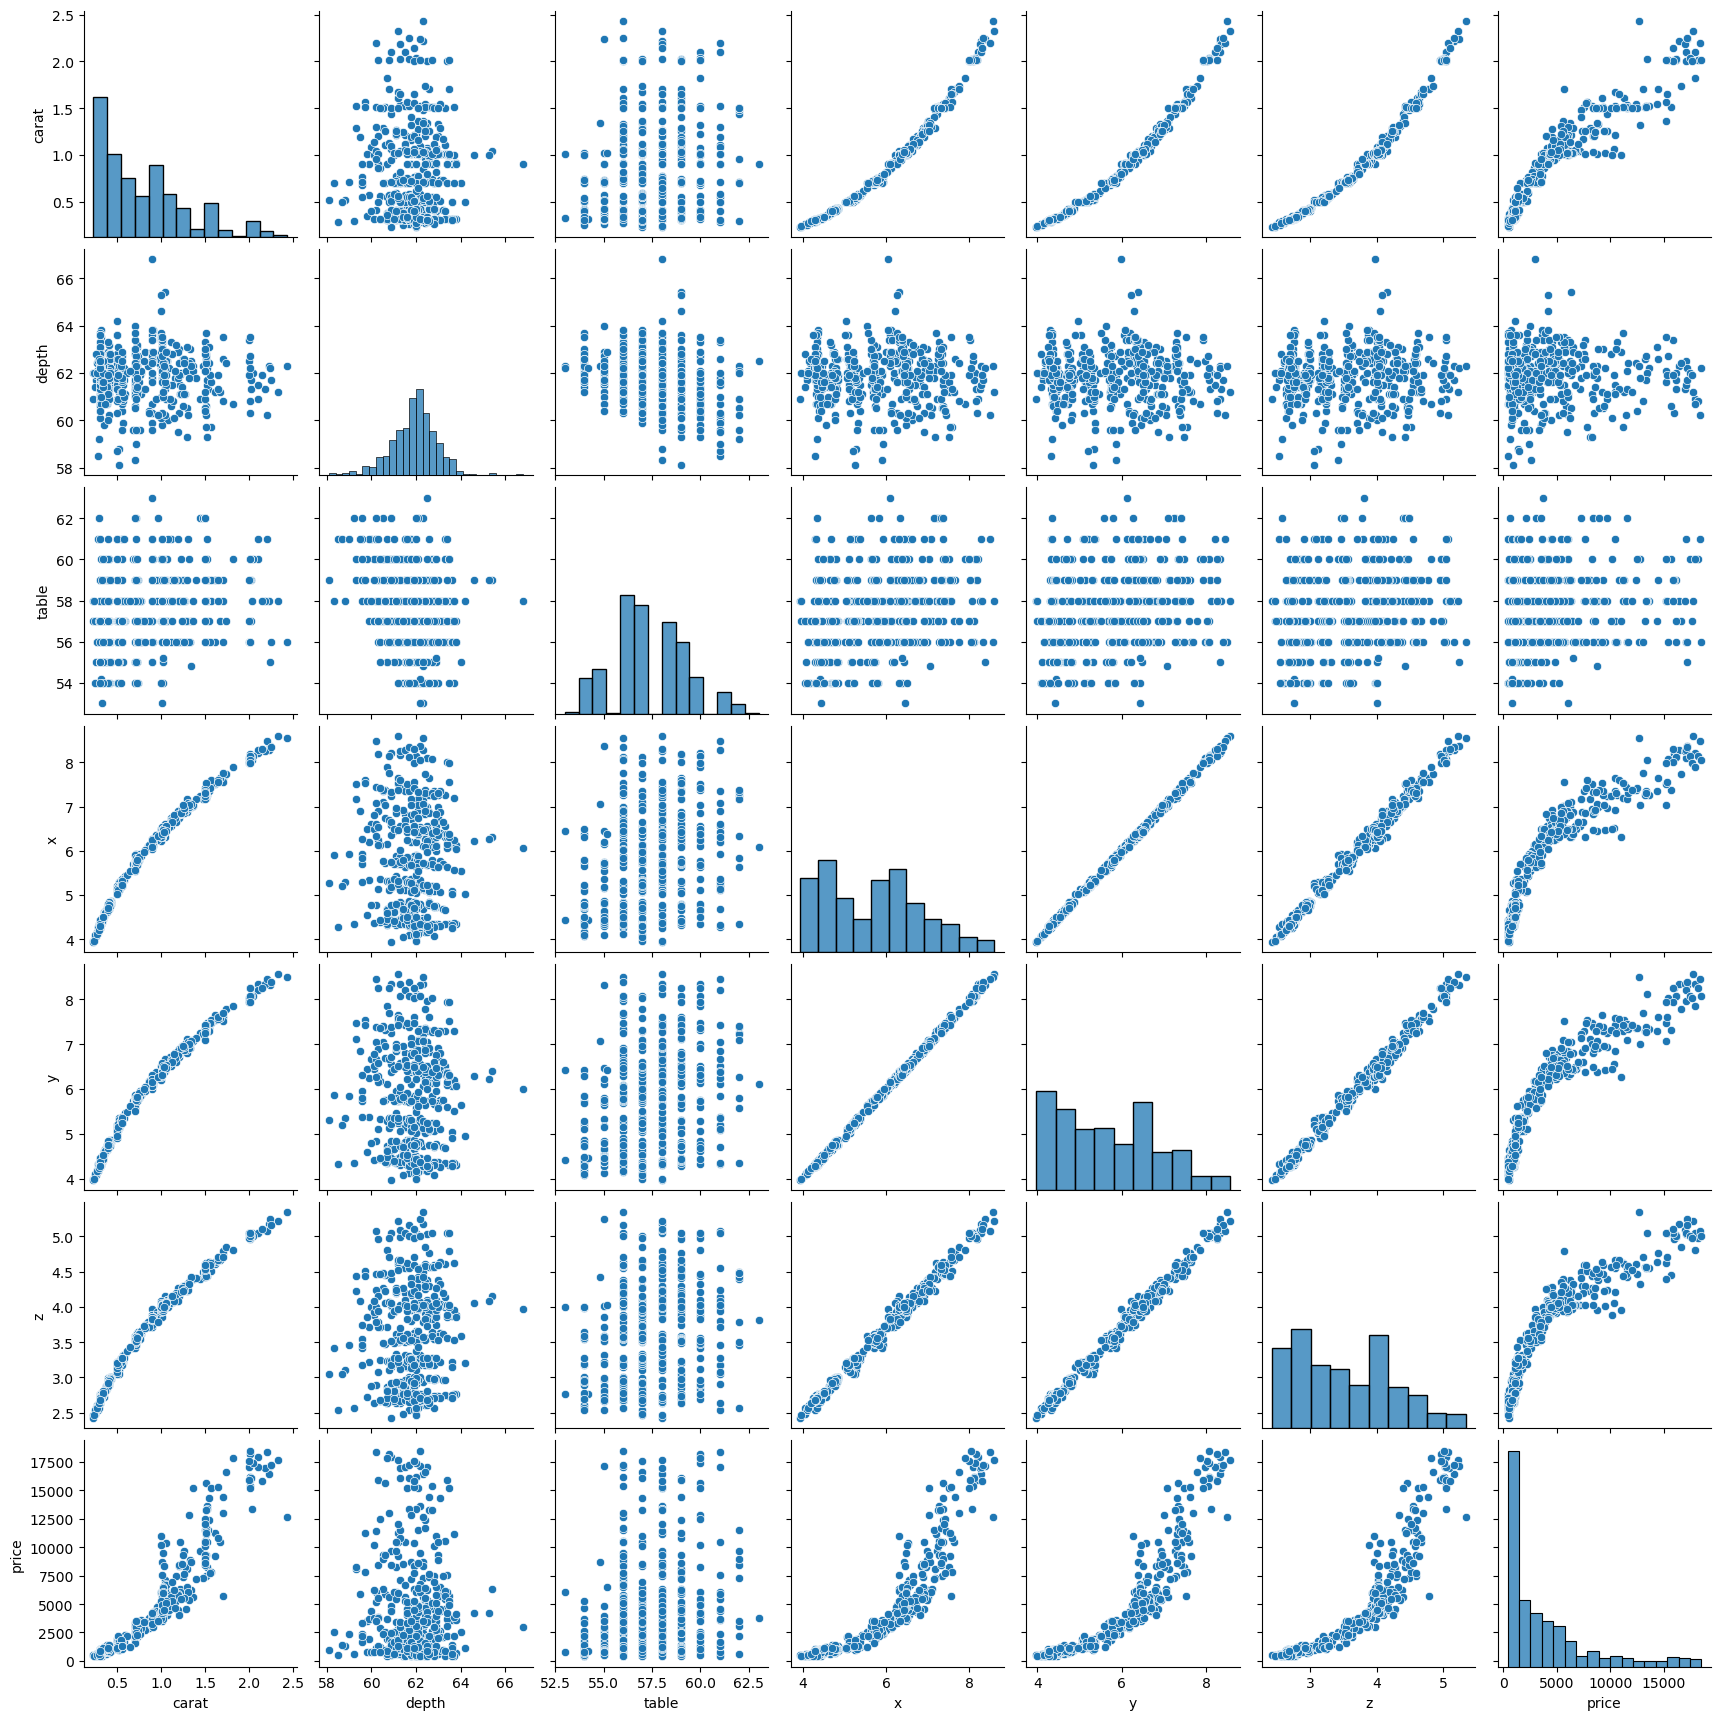

In [58]:
sns.pairplot(df.iloc[0:500])

In [59]:
cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

In [60]:
clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

In [61]:
color_map = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I':6, 'J': 7}

In [62]:
df['cut'] = df['cut'].replace(cut_map)
df['clarity'] = df['clarity'].replace(clarity_map)
df['color'] = df['cut'].replace(color_map)